Import the tidyverse.

In [2]:
library('tidyverse') #use valen's in class practice to study bc this
# glitches out when trying to load
# options(repr.plot.width=4, repr.plot.height=3, repr.plot.res = 300)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Bars

Let's use the "diamonds" data set. Preview the first five rows of the diamonds dataset using the `head` function.  
(*Hint: try* `?head` *to get the help page for the* `head` *function*)

In [3]:
diamonds %>% head
diamonds |> nrow()

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


[1] 53940

Make a bar chart of the "cut" column. About how many rows are there for the cut category "Ideal"?

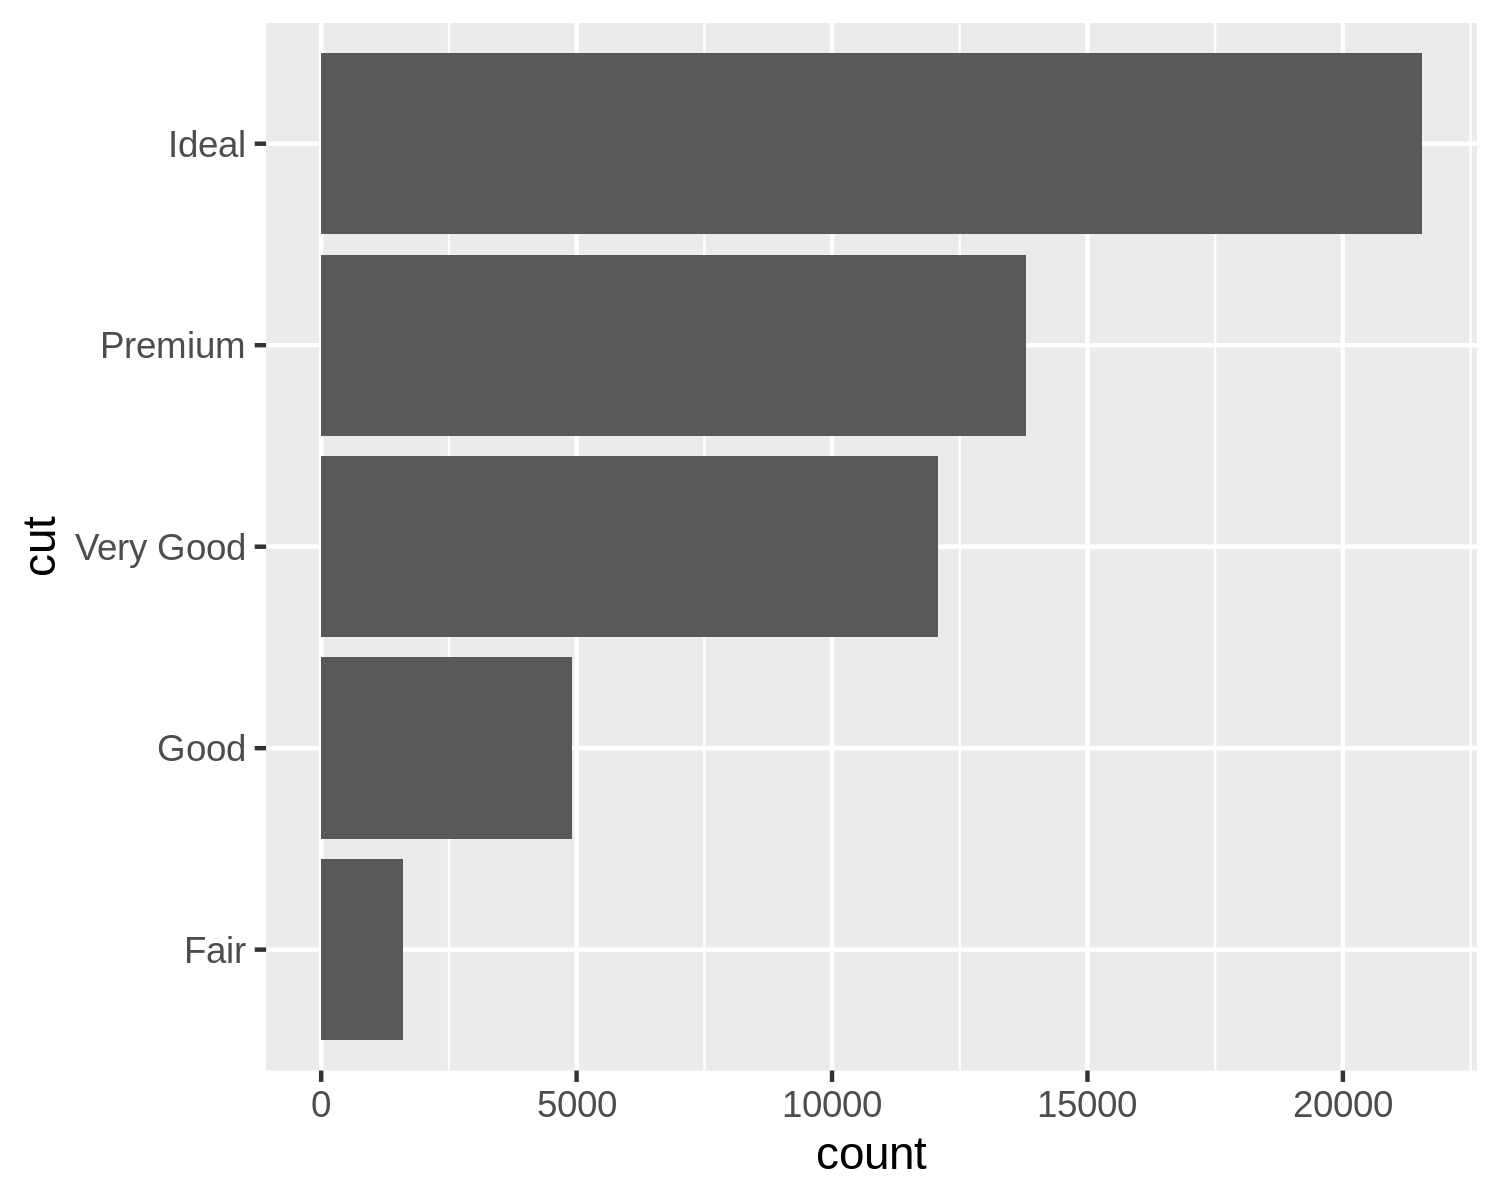

In [4]:
p = ggplot(diamonds, aes(y=cut)) + geom_bar(color = "#7BAFD4", fill = "#7BAFD4")
p

Use `coord_flip` to rotate the chart by 90 degrees. 

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



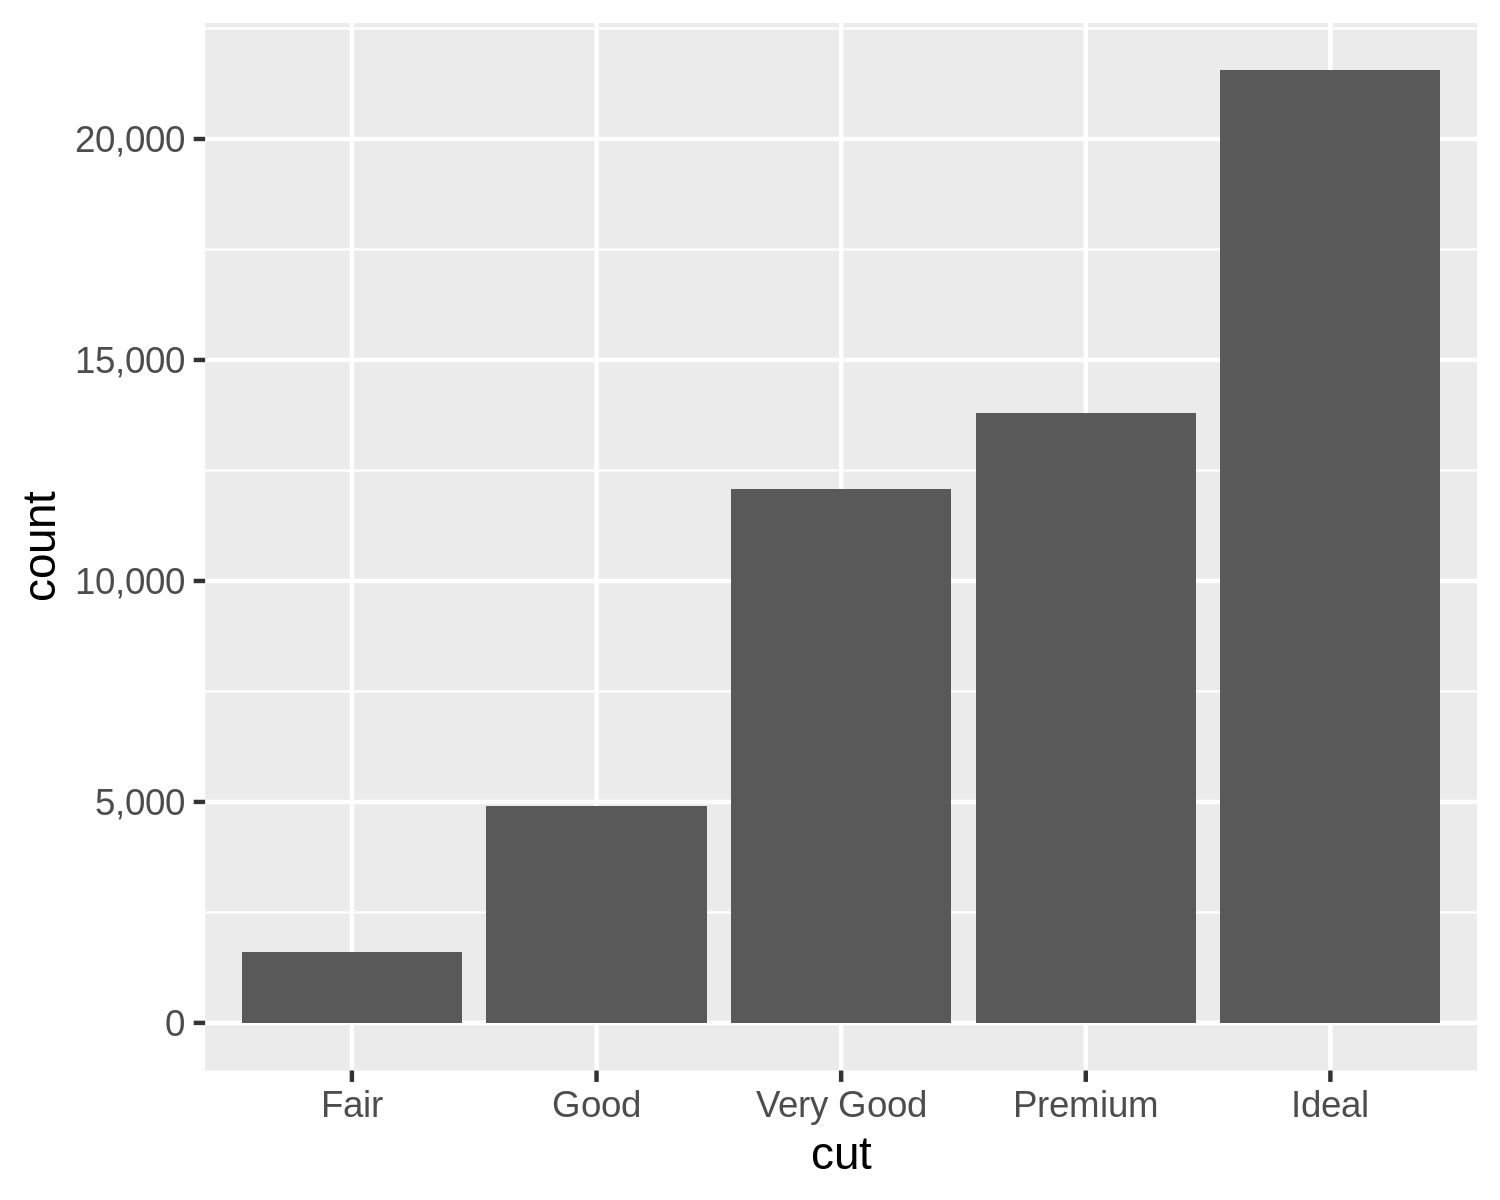

In [14]:
p = p + coord_flip() + scale_x_continuous(labels = scales::comma_format())
# or dollar_format()
p

# Lines

We'll use flight data from the Bureau of Transportation Statistics
https://www.transtats.bts.gov/DatabaseInfo.asp?DB_ID=120&Link=0

In [7]:
# uncomment the following:

library(nycflights13)
flight.data = flights %>%
group_by(month, carrier, year) %>%
summarize(N_flights = n()) %>%
filter(carrier %in% c('UA', 'AA', 'US'))

`summarise()` has grouped output by 'month', 'carrier'. You can override using
the `.groups` argument.


What are the columns in `flight.data`? (*Hint: preview the table*)

In [9]:
flight.data %>% head

month,carrier,year,N_flights
<int>,<chr>,<int>,<int>
1,AA,2013,2794
1,UA,2013,4637
1,US,2013,1602
2,AA,2013,2517
2,UA,2013,4346
2,US,2013,1552


First, make a bar chart of the `carrier` column? Does this make sense?

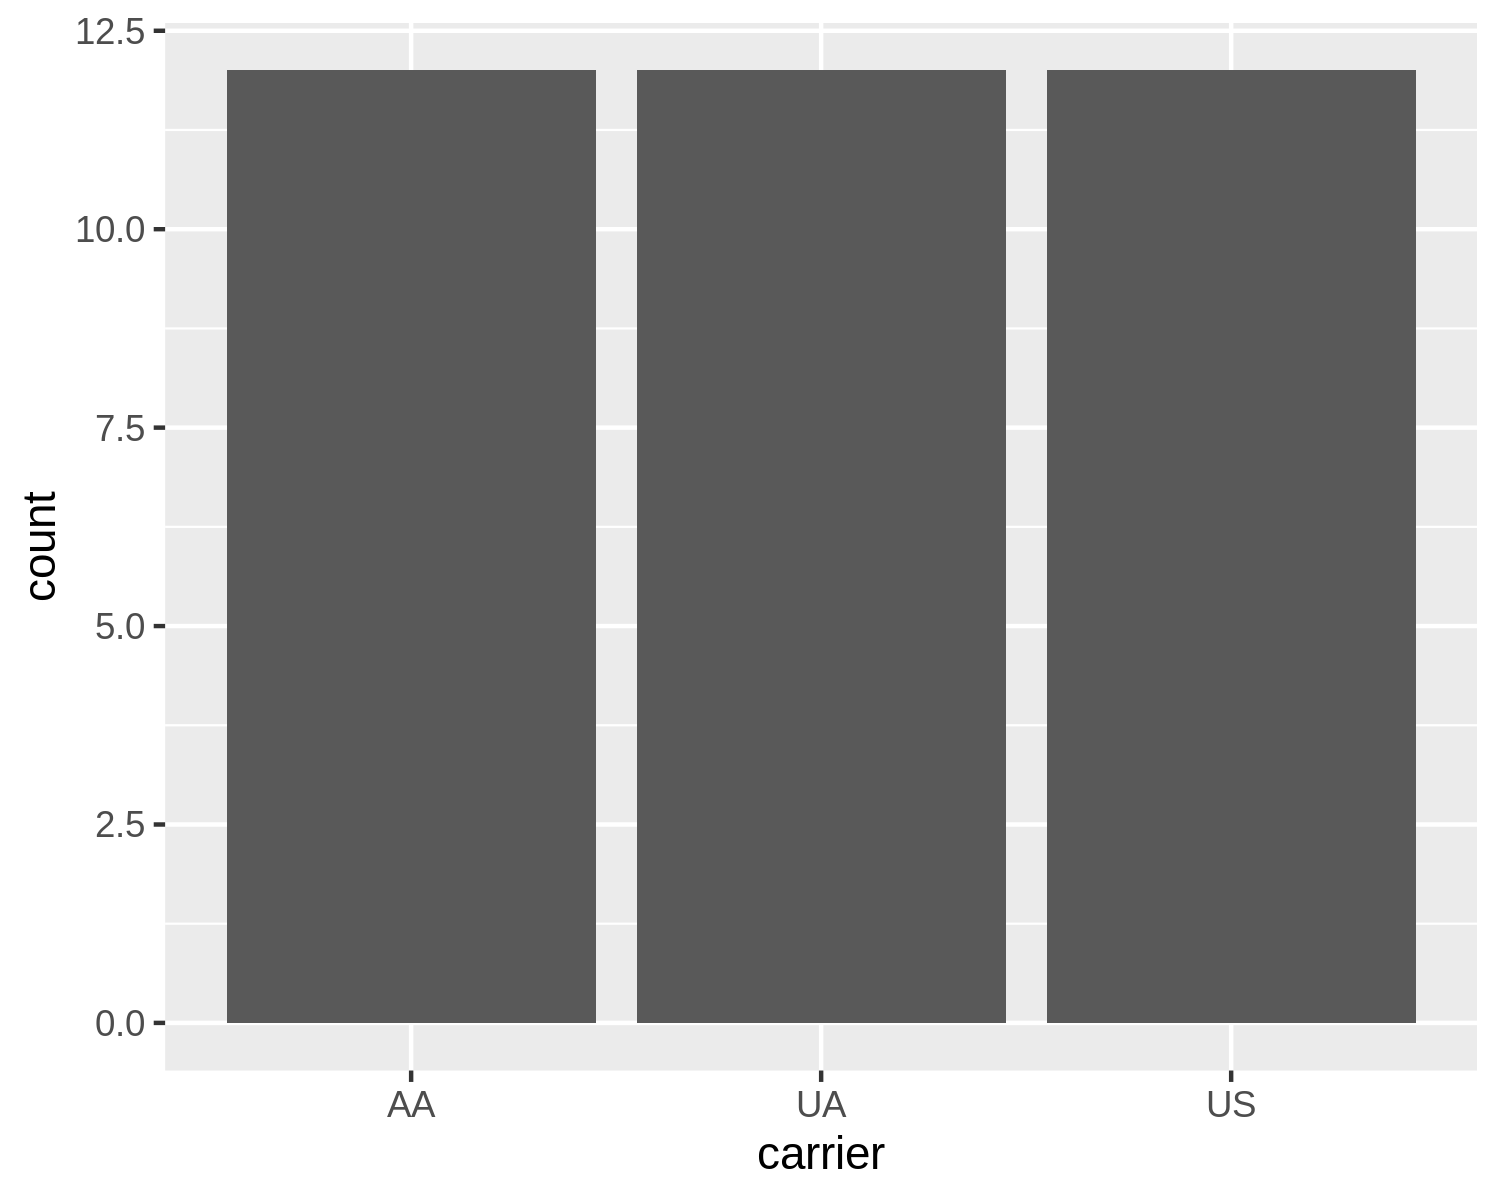

In [13]:
q = ggplot(flight.data, aes(x=carrier)) + geom_bar()
q

Plot month versus number of flights grouped according to carrier.

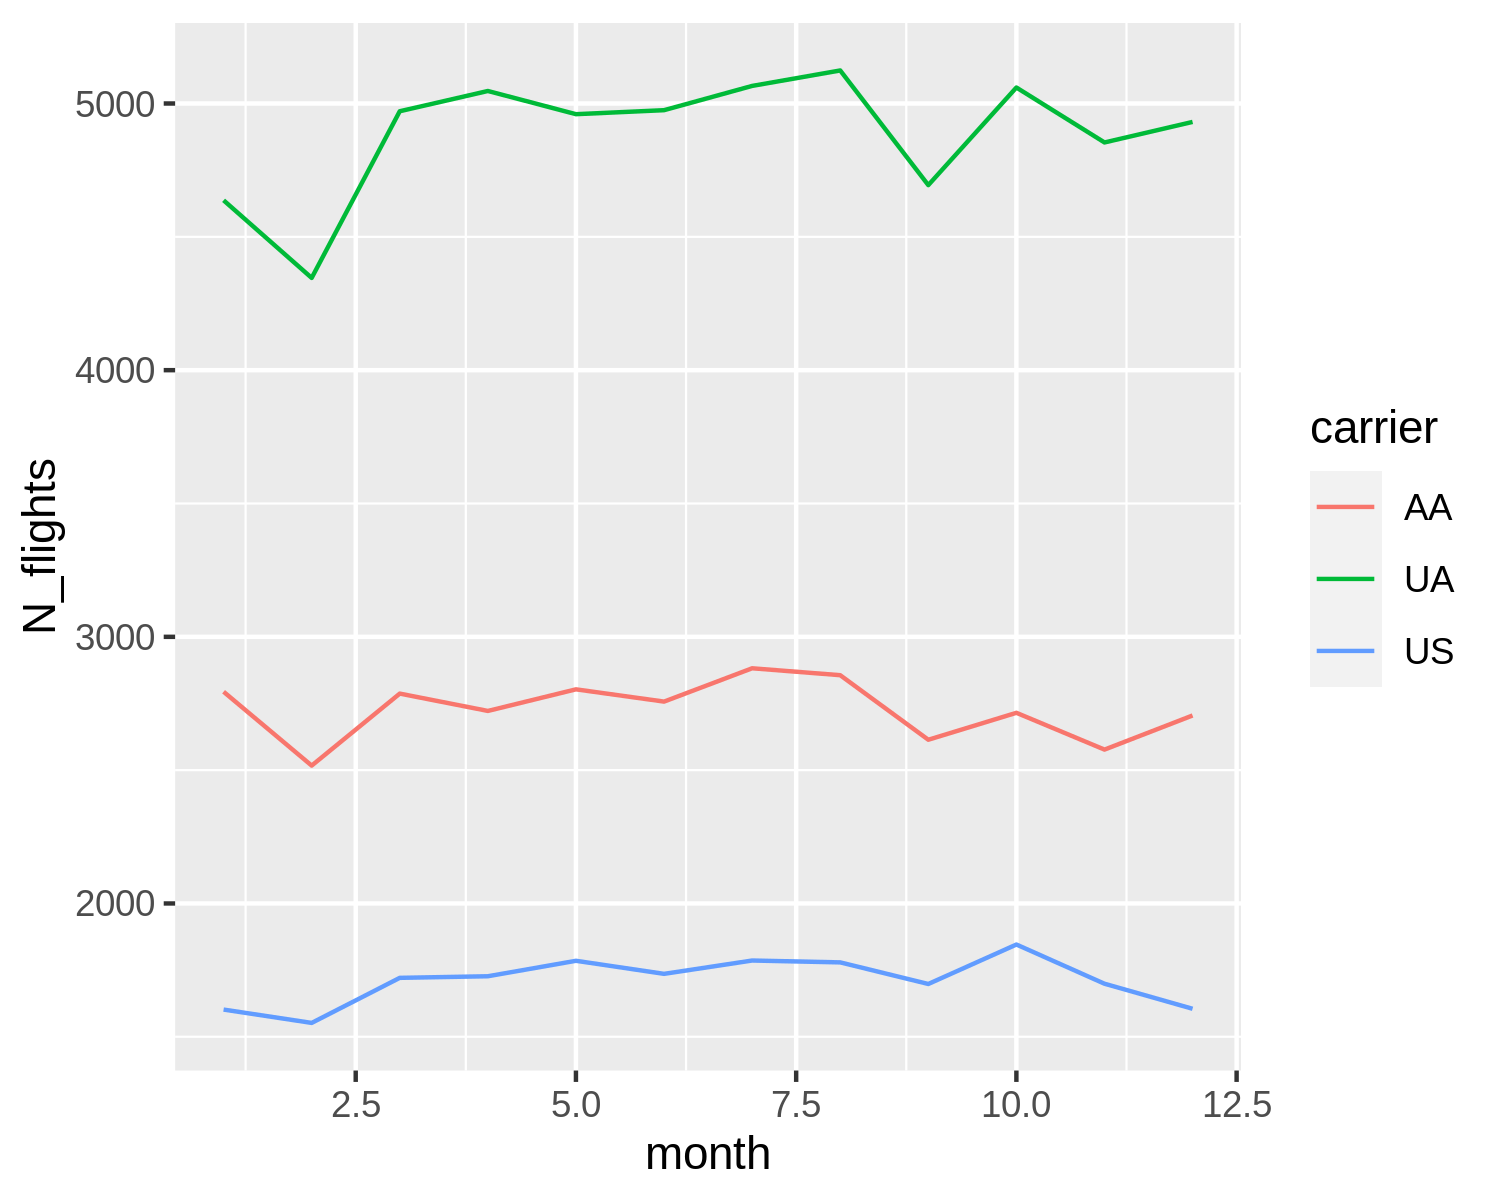

In [18]:
n = ggplot(flight.data, aes(x=month, y=N_flights, color=carrier)) + geom_line()
n

# Smooth

Plot a scatter plot (`geom_point`) of carat versus price with the diamonds dataset.

In [ ]:
r = ggplot(diamonds, aes(x=carat, y=price)) + geom_point()

There is a lot of overplotting in this figure. Make the same plot but use the `alpha` value to reduce
the opacity of the points.  
(*Hint: alpha values can be set from 0 (transparent) to 1 (opaque)*)

In [ ]:
r = r + geom_point(alpha = 0.05)

Facetting can also help with overplotting. Facet the chart by `cut`.

In [ ]:
options(repr.plot.width=7, repr.plot.height=6)
r = r + facet_wrap(~cut, ncol=3)

Add a `geom_smooth` to your facetted plot to emphasize the trend in the data.

In [ ]:
r = r + geom_smooth()

In [ ]:
# full code together
options(repr.plot.width=7, repr.plot.height=6)
r = ggplot(diamonds, aes(x = carat, y = price)) + 
    geom_point(color="#7BAFD4", alpha = 0.2) +
    facet_wrap(~cut, ncol=3) +
    geom_smooth()